In [22]:
#Install Graphviz for Python by running `conda install python-graphviz` in an Anaconda Prompt (Note: the `graphviz` package is different.)

from graphviz import Digraph

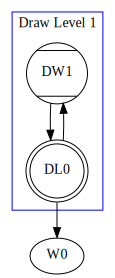

In [23]:
gameTree = Digraph(comment='DL')

gameTree.node('A', label='''<W<sub>0</sub>>''')

with gameTree.subgraph(name='cluster_1') as c:
    c.attr(color='blue')
    c.node('C', label='''<DW<sub>1</sub>>''', shape = 'Mcircle')
    c.node('B', label='''<DL<sub>0</sub>>''', shape='doublecircle')
    c.edges(['CB', 'BC'])
    c.attr(label='Draw Level 1')


#gameTree.node('C', 'DW1_1')
#gameTree.node('B', 'DL1_0')
gameTree.edges(['BA'])#, 'CB', 'BC'])

gameTree

In [24]:
def create_min_tree(x):
    tree_list = []
    while(x > 0):
        node1 = [chr(ord('A')+x), "\'\'<DW<sub>1</sub>>\'\'", 'Mcircle']
        node2 = [chr(ord('a')+x), "\'\'<DL<sub>0</sub>>\'\'", 'doublecircle']
        if(not(len(tree_list))):
            edges = [node1[0]+node2[0], node2[0]+node1[0]]
        else:
            edges = [node1[0]+node2[0], node2[0]+node1[0], tree_list[-1][-2][0]+node1[0]]
        level_list = [node1, node2, edges]
        tree_list.append(level_list)
        x-=1
    last_node = ['A', "\'\'<W<sub>0</sub>>\'\'" , 'circle']
    if(len(tree_list)):
        last_edge = [tree_list[-1][-2][0]+last_node[0]]
    else:
        last_edge = []
    last_level = [last_node, last_edge]
    tree_list.append(last_level)
    return tree_list

In [25]:
create_min_tree(3)

[[['D', "''<DW<sub>1</sub>>''", 'Mcircle'],
  ['d', "''<DL<sub>0</sub>>''", 'doublecircle'],
  ['Dd', 'dD']],
 [['C', "''<DW<sub>1</sub>>''", 'Mcircle'],
  ['c', "''<DL<sub>0</sub>>''", 'doublecircle'],
  ['Cc', 'cC', 'dC']],
 [['B', "''<DW<sub>1</sub>>''", 'Mcircle'],
  ['b', "''<DL<sub>0</sub>>''", 'doublecircle'],
  ['Bb', 'bB', 'cB']],
 [['A', "''<W<sub>0</sub>>''", 'circle'], ['bA']]]

In [26]:
def graph_tree(tree_list):
    gameTree = Digraph(comment='DL')
    
    num_levels = len(tree_list)
    

    for x in range(num_levels - 1):
        num = num_levels - 1 - x
        node_list = tree_list[x][:-1]
        edge_list = tree_list[x][-1]
        print(node_list)
        with gameTree.subgraph(name='cluster_' + str(x)) as c:
            c.attr(color='blue')
            for node in node_list:
                label_str = node[1] #''.join([str(elem) for elem in node[1]]) 
                print(label_str)
                c.node(node[0], label=label_str, shape=node[2])
            c.edges(edge_list)
            c.attr(label='Draw Level ' + str(num))
            
    last_node = tree_list[-1][:-1]
    last_edge = tree_list[-1][-1]
    for node in last_node:
        print(node)
        label_str = node[1] #''.join([str(elem) for elem in node[1]]) 
        print(label_str)
        c.node(node[0], label=label_str, shape=node[2])
    gameTree.edges(last_edge)
    
    return gameTree

[['E', "''<DW<sub>1</sub>>''", 'Mcircle'], ['e', "''<DL<sub>0</sub>>''", 'doublecircle']]
''<DW<sub>1</sub>>''
''<DL<sub>0</sub>>''
[['D', "''<DW<sub>1</sub>>''", 'Mcircle'], ['d', "''<DL<sub>0</sub>>''", 'doublecircle']]
''<DW<sub>1</sub>>''
''<DL<sub>0</sub>>''
[['C', "''<DW<sub>1</sub>>''", 'Mcircle'], ['c', "''<DL<sub>0</sub>>''", 'doublecircle']]
''<DW<sub>1</sub>>''
''<DL<sub>0</sub>>''
[['B', "''<DW<sub>1</sub>>''", 'Mcircle'], ['b', "''<DL<sub>0</sub>>''", 'doublecircle']]
''<DW<sub>1</sub>>''
''<DL<sub>0</sub>>''
['A', "''<W<sub>0</sub>>''", 'circle']
''<W<sub>0</sub>>''


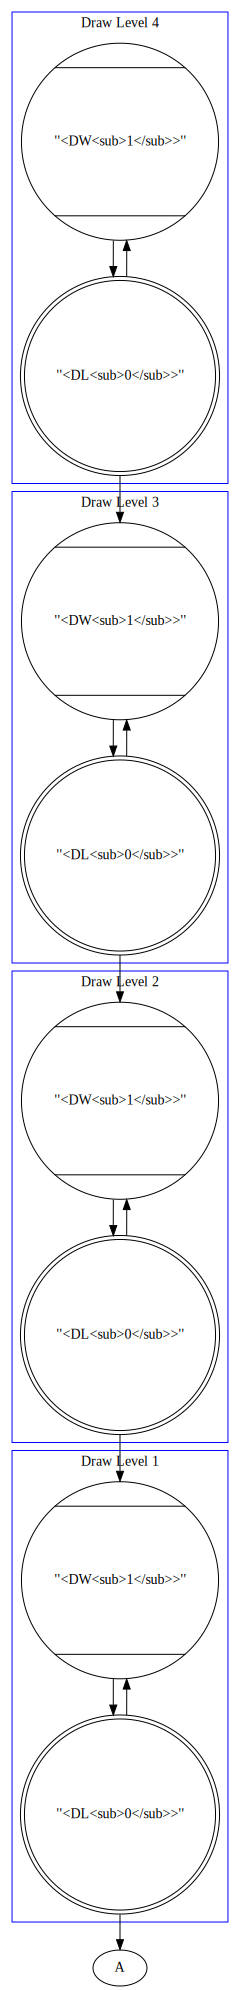

In [27]:
graph_tree(create_min_tree(4))